<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/DetectionAlertes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Détection de signes arithmétiques 

Dans cet exercice, le but est de créer un système très basique de détection de signes arithmétiques (+-x/)  par réseaux de neurones en se basant sur une représentation en 3x3 points.

---
## Importer les librairies

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#pour les graphiques
import matplotlib.pyplot as plt

---

### Définir les entrées et sorties attendues

Les entrées correspondent aux pixels des images des opérateurs.
- Les entrées sont constituées de 9 pixels (3x3). 
- Les sorties correspondent à la probabilité que l'entrée soit +,-,x ou /.

| + | + | + |   | - | - | - |   | x | x | x |   | / | / | / |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|   | █ |   |   |   |   |   |   | █ |   | █ |   |   |   | █ |
| █ | █ | █ |   | █ | █ | █ |   |   | █ |   |   |   | █ |   |
|   | █ |   |   |   |   |   |   | █ |   | █ |   | █ |   |   |


In [3]:
#définissez les entrées sorties sur base du tableau
entrees = np.array([
    [0,1,0,
     1,1,1,
     0,1,0],
    [0,0,0,
     1,1,1,
     0,0,0],
    [1,0,1,
     0,1,0,
     1,0,1],
    [0,0,1,
     0,1,0,
     1,0,0]],float) 

sorties = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]], float)


---

### Choisir le modèle de réseau


---

### Définir l'architecture du réseau
Ici, un réseau très simple : 
- une couche de sortie composée de 4 neurones (proba que l'image soit +, -, x ou /), connectés chacun à neuf entrées (1 par pixel)


In [4]:
model = Sequential()

In [5]:
#une couche constituée de 4 neurones en sortie
model.add(Dense(4, use_bias=False, activation='sigmoid'))

---

### Compiler le  réseau
- ici, on précise que l'algo de correction d'erreur est *'adam'*, et que l'erreur calculée est la moyenne des erreurs (décalage entre la sortie calculée et la sortie attendue) au carré. 
On indique également que l'on veut voir apparaître en plus la précision de l'apprentissage (accuracy).

In [6]:
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

---

### Entraîner le réseau 
- ici on  le fait  'parler' (verbose=1), et on lance xx cycles d'apprentissage *(epochs à préciser)*


In [13]:
tests = model.fit(entrees, sorties, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0658
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0658
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0657
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0656
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0655
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0654
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0654
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0653
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0652
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0651
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0650
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy:

---

## Dessiner l'évolution de l'erreur et de la pertinence


In [14]:
history_dict = tests.history
eval_tests = list(history_dict.keys())
print("les ensembles de valeurs récupérées lors des tests sont ")
print(eval_tests)
print("-> [perte sur exemple d'entrainement, qualité sur exemples d'entrainement,perte sur exemple de validation, qualité sur exemples de validation]")

les ensembles de valeurs récupérées lors des tests sont 
['accuracy', 'loss']
-> [perte sur exemple d'entrainement, qualité sur exemples d'entrainement,perte sur exemple de validation, qualité sur exemples de validation]


#### Tracer précision du réseau et ses erreurs 
- Petits codes pour tracer l'évolution de la précision et de l'erreur commise au fur et à mesure de l'apprentissage

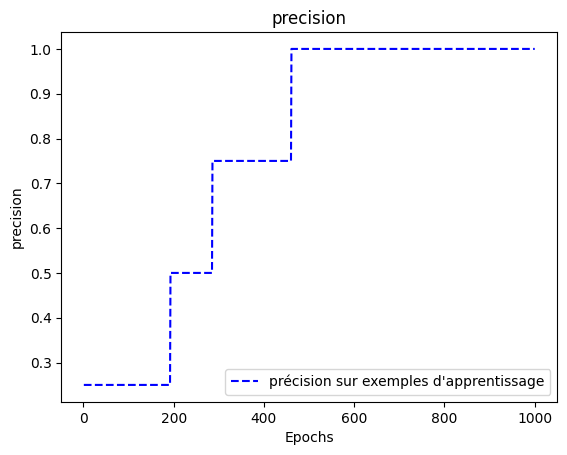

In [9]:
import matplotlib.pyplot as plt

loss = history_dict[eval_tests[0]]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='précision sur exemples d\'apprentissage')
plt.title('precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()

plt.show()

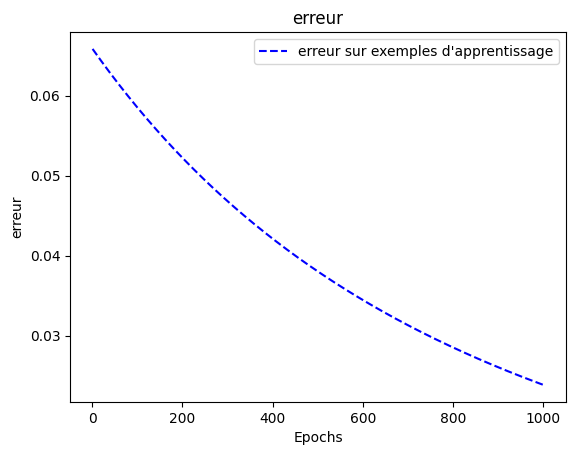

In [15]:
acc = history_dict[eval_tests[1]]

epochs = range(1, len(loss) + 1)

# draw the loss evolution in blue
plt.plot(epochs, acc, 'b--', label='erreur sur exemples d\'apprentissage')
plt.title('erreur')
plt.xlabel('Epochs')
plt.ylabel('erreur')
plt.legend()

plt.show()

---
## Utilisation du réseau
Test des entrées initiales :

In [11]:
entrees

array([[0., 1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [16]:
predictions = model.predict(entrees)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.81627035 0.1967991  0.02932991 0.01758563]
 [0.19625762 0.7944549  0.15496762 0.07083479]
 [0.03789004 0.05643122 0.79646957 0.1892775 ]
 [0.14541622 0.10344187 0.20533462 0.7960158 ]]


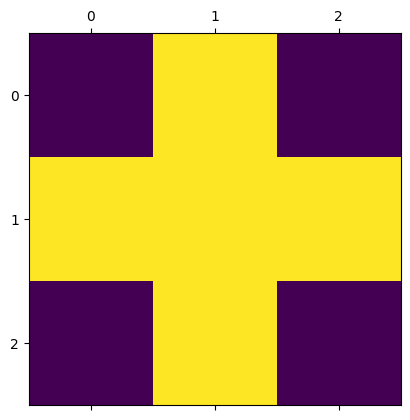

correspond à  +


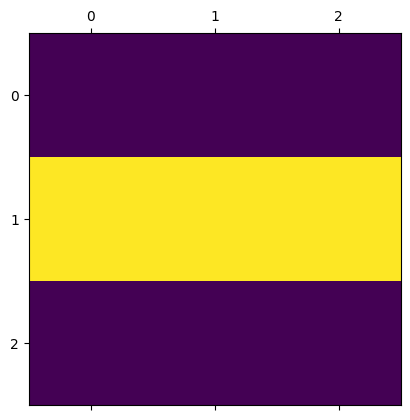

correspond à  -


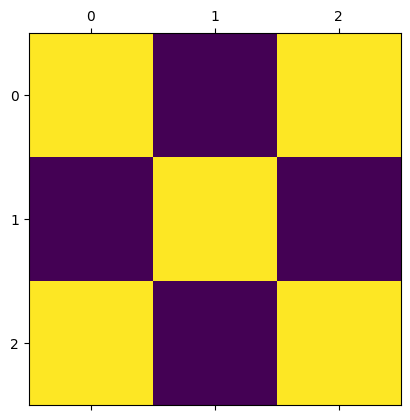

correspond à  x


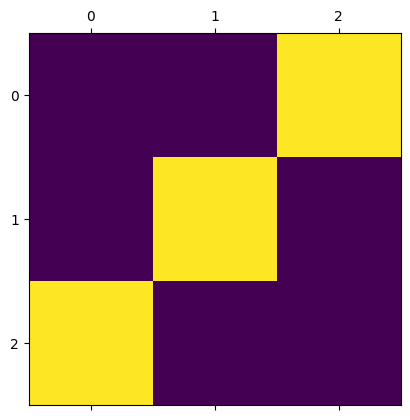

correspond à  /


In [17]:
operateurs = ['+','-','x','/']
for i in range(len(entrees)):
    plt.matshow(np.reshape(entrees[i],(3,3)))
    plt.show()
    print("correspond à ", operateurs[np.argmax(predictions[i])])


Test d'entrées dégradées : 

| + | + | + |   | - | - | - |   | x | x | x |   | / | / | / |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|   | █ |   |   |   |   |   |   | █ |   |   |   |   |   | █ |
| █ | █ |   |   |   | █ | █ |   |   |   |   |   |   |   |   |
|   | █ |   |   |   |   |   |   | █ |   | █ |   | █ |   |   |


In [20]:
#définissez les entrées sorties sur base du tableau
entrees_tests = np.array([
    [0,1,0,
     1,1,0,
     0,1,0],
    [0,0,0,
     0,1,0,
     0,0,0],
    [1,0,0,
     0,0,0,
     1,0,1],
    [1,1,1,
     0,0,0,
     0,0,0]],float) 

predictions = model.predict(entrees_tests)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.9206688  0.07899193 0.0467406  0.04726347]
 [0.428826   0.24970925 0.3243989  0.4531463 ]
 [0.08000832 0.18517005 0.9035184  0.10279955]
 [0.5350263  0.07955245 0.45333868 0.10681816]]


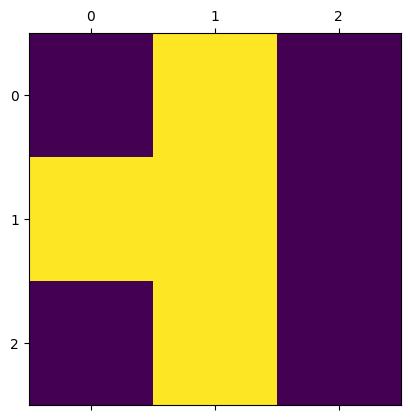

correspond à  +


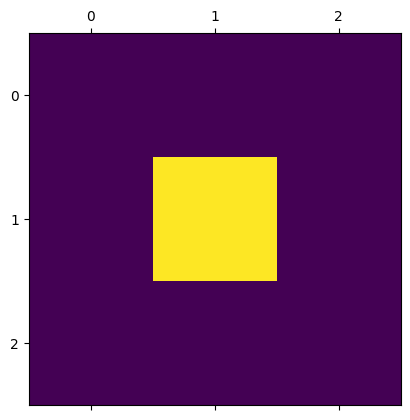

correspond à  /


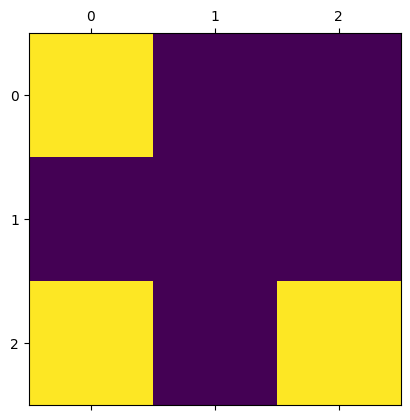

correspond à  x


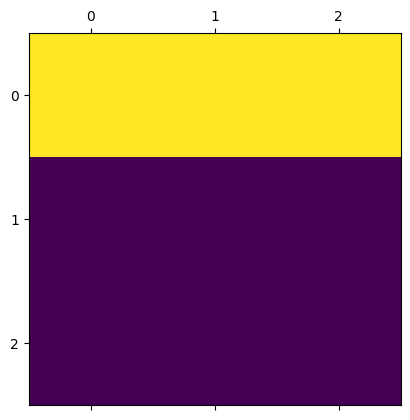

correspond à  +


In [21]:
for i in range(len(entrees)):
    plt.matshow(np.reshape(entrees_tests[i],(3,3)))
    plt.show()
    print("correspond à ", operateurs[np.argmax(predictions[i])])
